#Load the data and understand it

In [1]:
import pandas as pd
df = pd.read_csv('/content/2) Stock Prices Data Set.csv')
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943.0
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957.0
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711.0
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061.0
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391.0


In [2]:
df.tail()

,symbol,date,open,high,low,close,volume
129573,NSC,2015-01-23,106.13,106.13,104.75,104.78,1925481.0
129574,NTAP,2015-01-23,39.70,39.74,39.23,39.48,1990737.0
129575,NTRS,2015-01-23,67.66,68.29,66.82,66.88,1863303.0
129576,NUE,2015-01-23,45.21,45.22,43.79,43.80,2614017.0
129577,NVDA,2015-01-23,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129578 entries, 0 to 129577
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  129578 non-null  object 
 1   date    129578 non-null  object 
 2   open    129577 non-null  float64
 3   high    129577 non-null  float64
 4   low     129577 non-null  float64
 5   close   129577 non-null  float64
 6   volume  129577 non-null  float64
dtypes: float64(5), object(2)
memory usage: 6.9+ MB


In [4]:
df.shape

(129578, 7)

In [5]:
df['symbol'].value_counts()

,count
symbol,
NVDA,267
NUE,267
NTRS,267
NTAP,267
NSC,267
...,...
NAVI,194
INFO,151
SYF,121


In [6]:
df.isna().sum()

,0
symbol,0
date,0
open,1
high,1
low,1
close,1
volume,1


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

,0
symbol,0
date,0
open,0
high,0
low,0
close,0
volume,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,open,high,low,close,volume
count,129577.000000,129577.000000,129577.000000,129577.000000,1.295770e+05
mean,77.222979,77.912138,76.505107,77.221564,4.186452e+06
std,82.239672,82.993320,81.348194,82.177828,8.376991e+06
min,2.180000,2.430000,2.140000,2.240000,7.932000e+03
25%,39.850000,40.225000,39.490000,39.860000,1.028473e+06
50%,59.710000,60.220000,59.145000,59.720000,1.991884e+06
75%,88.550000,89.270000,87.830000,88.580000,4.159902e+06
max,1372.550000,1378.960000,1361.100000,1370.430000,6.182376e+08


In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129577 entries, 0 to 129576
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  129577 non-null  object        
 1   date    129577 non-null  datetime64[ns]
 2   open    129577 non-null  float64       
 3   high    129577 non-null  float64       
 4   low     129577 non-null  float64       
 5   close   129577 non-null  float64       
 6   volume  129577 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 7.9+ MB


In [36]:
df.index.min()

Timestamp('2014-01-02 00:00:00')

In [37]:
df.index.max()

Timestamp('2015-01-23 00:00:00')

In [14]:
# Check if 'date' is already the index
if 'date' not in df.columns:
  print("'date' is already the index.")
else:
  # If 'date' is a column, set it as the index
  df.set_index('date', inplace=True)
  print("'date' has been set as the index.")
df.head()

'date' has been set as the index.


,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943.0
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957.0
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711.0
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061.0
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391.0


In [15]:
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943.0
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957.0
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711.0
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061.0
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391.0


#EDA(Exploratory Data Analysis

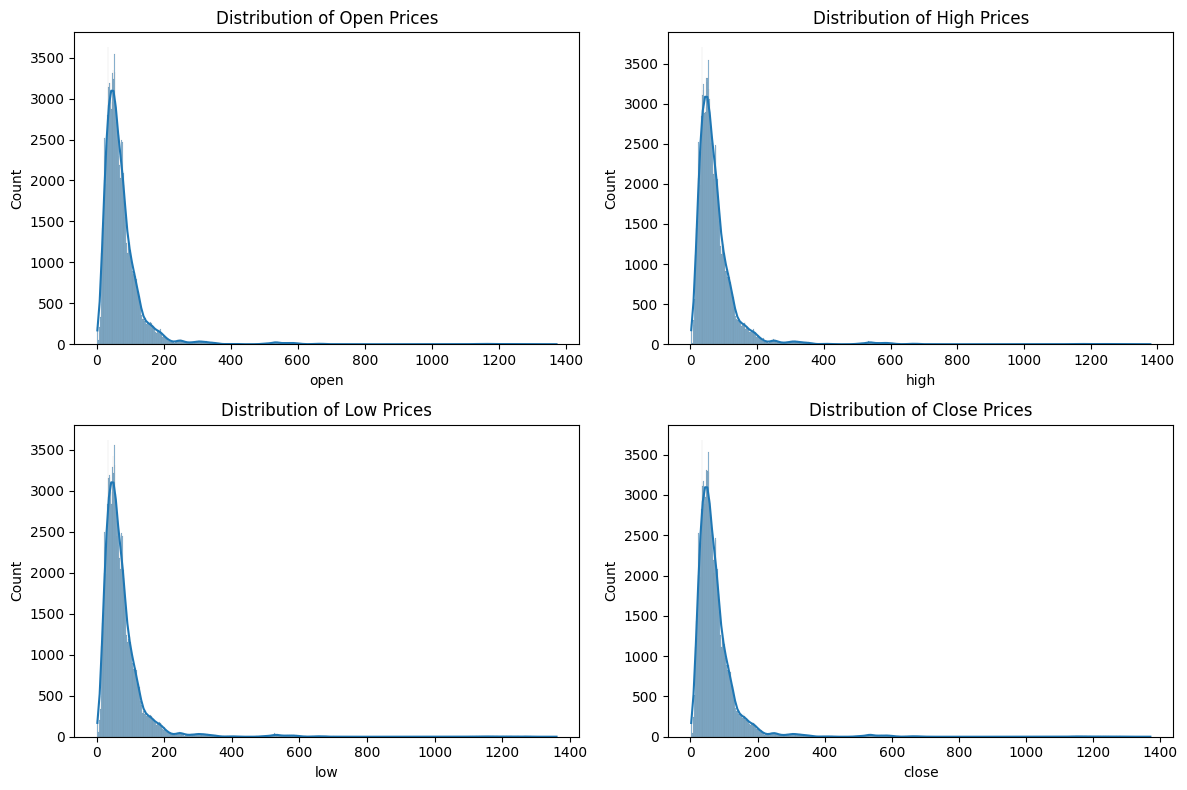

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for 'open', 'high', 'low', and 'close' prices
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['open'], kde=True)
plt.title('Distribution of Open Prices')

plt.subplot(2, 2, 2)
sns.histplot(df['high'], kde=True)
plt.title('Distribution of High Prices')

plt.subplot(2, 2, 3)
sns.histplot(df['low'], kde=True)
plt.title('Distribution of Low Prices')

plt.subplot(2, 2, 4)
sns.histplot(df['close'], kde=True)
plt.title('Distribution of Close Prices')

plt.tight_layout()
plt.show()


<Axes: xlabel='date'>

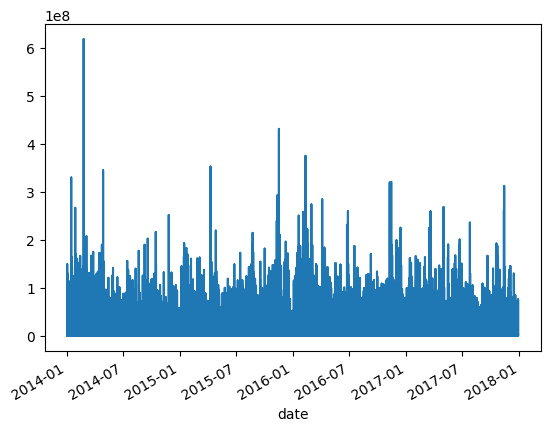

In [ ]:
df['volume'].plot()

<Axes: xlabel='date'>

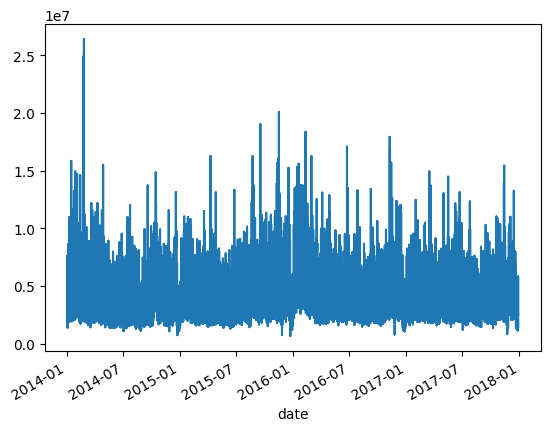

In [ ]:
df['volume'].rolling(window=30).mean().plot()

<Axes: xlabel='date'>

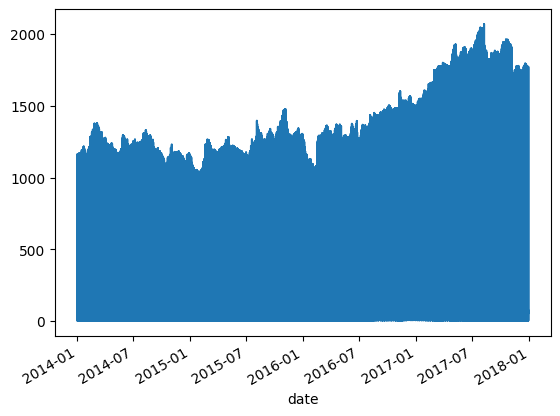

In [ ]:
df['high'].plot()

<Axes: xlabel='date'>

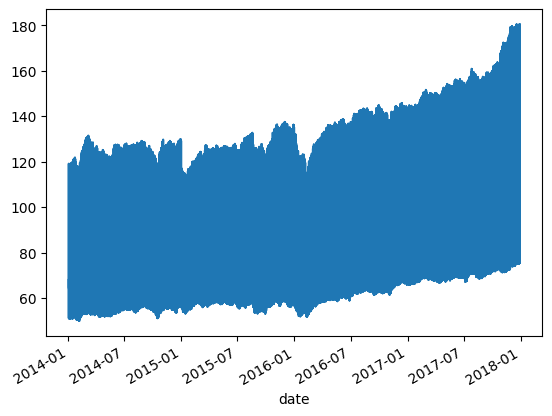

In [ ]:
df['high'].rolling(window=30).mean().plot()

<Axes: xlabel='date'>

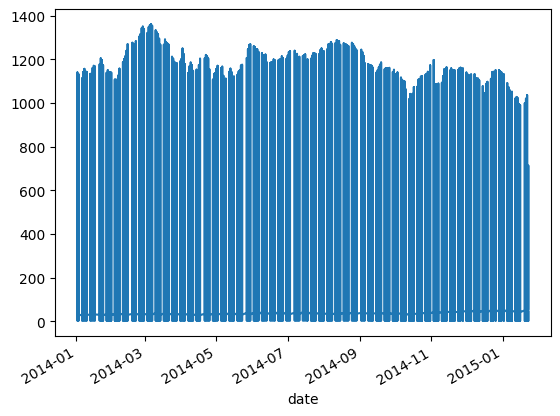

In [25]:
df['low'].plot()

<Axes: xlabel='date'>

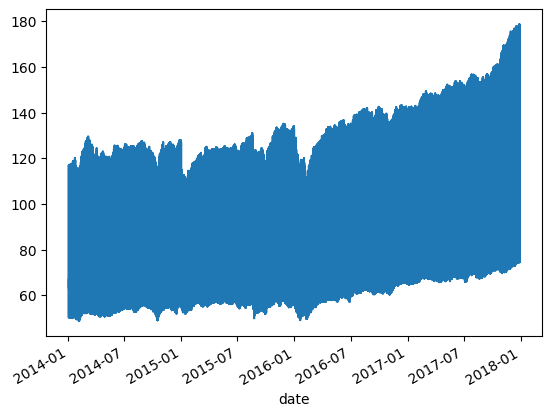

In [ ]:
df['low'].rolling(window=30).mean().plot()

<Axes: xlabel='date'>

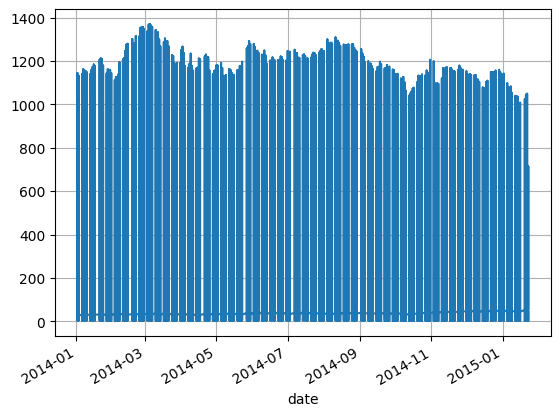

In [21]:
df['close'].plot(grid=True)

<Axes: xlabel='date'>

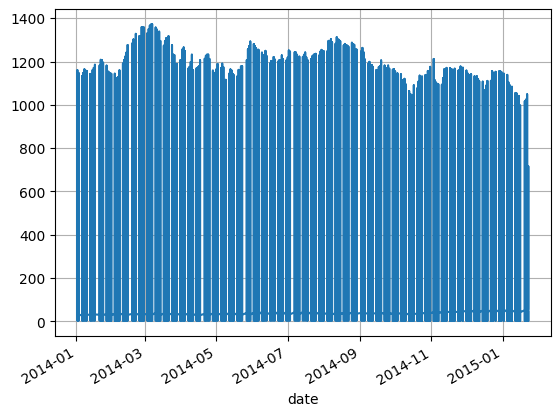

In [20]:
df['open'].plot(grid=True)

<Axes: xlabel='date'>

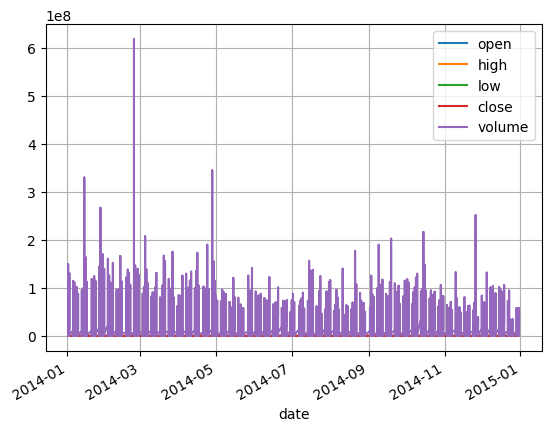

In [23]:
df_2014 = df.loc['2014-01-01':'2014-12-31']
df_2014.plot(grid=True)

<Axes: xlabel='date'>

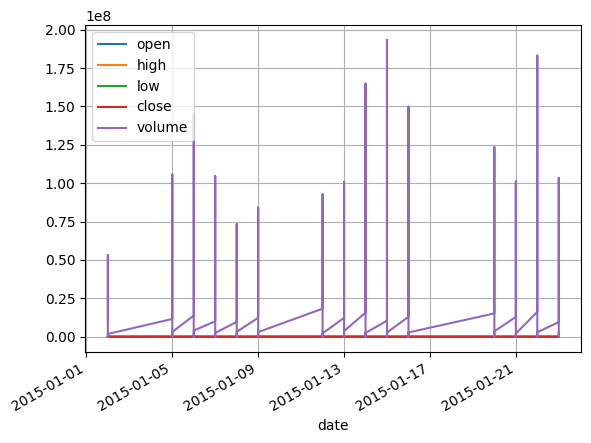

In [24]:
df_2015 = df.loc['2015-01-01':'2015-12-31']
df_2015.plot(grid=True)

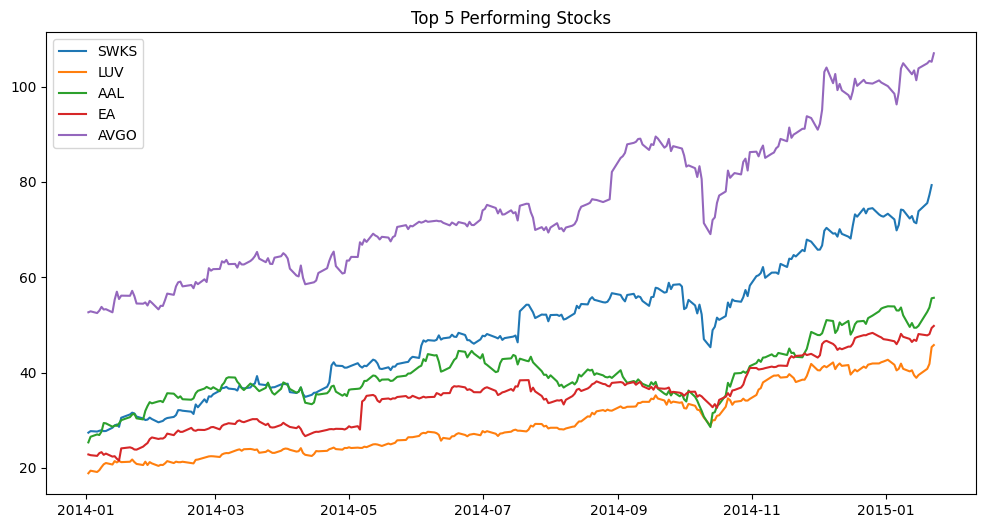

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
returns = df.groupby('symbol')['close'].last() / df.groupby('symbol')['close'].first() - 1
top_5 = returns.nlargest(5).index  # Top 5 performers
bottom_5 = returns.nsmallest(5).index  # Bottom 5 performers

for symbol in top_5:
    plt.plot(df[df['symbol'] == symbol].index, df[df['symbol'] == symbol]['close'], label=symbol)
plt.legend()
plt.title('Top 5 Performing Stocks')
plt.show()

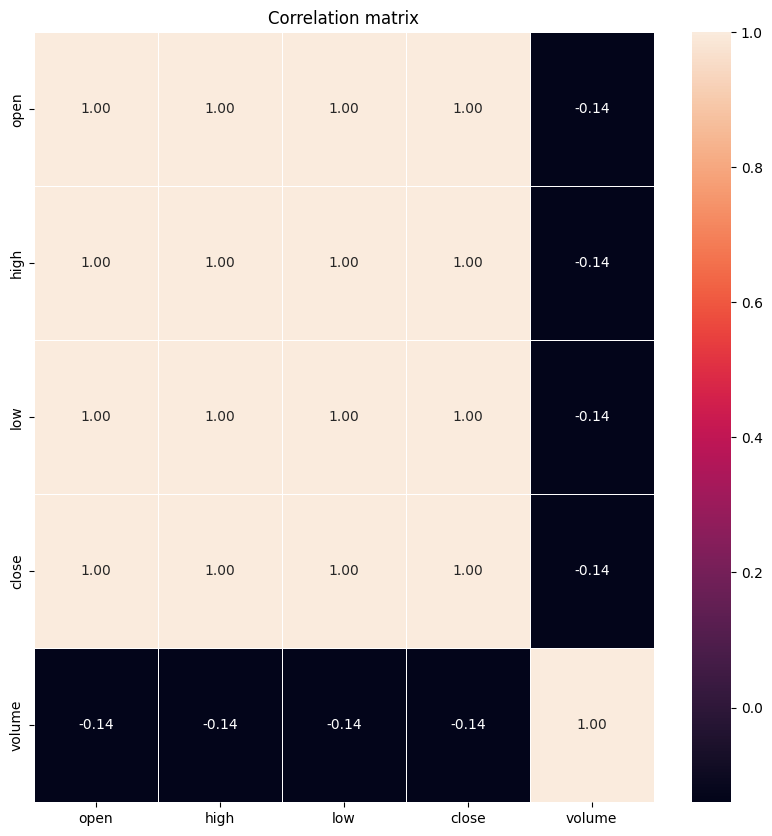

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
data = df.drop('symbol', axis=1)
# Calculate the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=.5, fmt= '.2f')
plt.title('Correlation matrix')
plt.show()

#Feature engineering

In [28]:
#returns
df['daily_return'] = (df['close'] - df['open']) / df['open']

In [30]:
#volatility
df['daily_volatility'] = (df['high'] - df['low']) / df['open']

In [35]:
df.head()

,symbol,open,high,low,close,volume,daily_return,daily_volatility
date,,,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943.0,0.011568,0.030315
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957.0,-0.004589,0.009013
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711.0,-0.005618,0.023469
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061.0,-0.002686,0.015541
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391.0,-0.003138,0.010697
